# Daft.ie data wrangling

<p>In this notebook we will work with the data of the of houses publisheds in the month of January 2022 in the website <a href="https://www.daft.ie/">Daft.ie</a>.</p>
<p>The data used was extracted from a <a href="https://www.kaggle.com/datasets/eavannan/daftie-house-price-data">Kaggle dataset</a>.</p>

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


In [79]:
# Read CSV file without setting any column as the index
df = pd.read_csv("daft_data_01_2022.csv", index_col=False)

In [80]:
df.head()

,id,title,featuredLevel,publishDate,price,numBedrooms,numBathrooms,propertyType,propertySize,category,...,seller_name,seller_branch,sellerType,m_totalImages,m_hasVideo,m_hasVirtualTour,m_hasBrochure,ber_rating,longitude,latitude
0,3626025,"11 Chestnut Crescent, Bridgemount, Carrigaline...",featured,2022-01-28,290000,3,3,End of Terrace,96.0,Buy,...,Roy Dennehy,Dennehy Auctioneers,BRANDED_AGENT,16.0,False,False,False,C2,-8.382500,51.822940
1,3675175,"58 The Glen, Kilnacourt Woods, Portarlington, ...",featured,2022-01-28,225000,3,2,Semi-D,93.0,Buy,...,Marie Kiernan,Tom McDonald & Associates,BRANDED_AGENT,33.0,False,False,False,C1,-7.177098,53.157465
2,3673450,"16 Dodderbrook Park, Ballycullen, Dublin 24",featured,2022-01-27,575000,4,3,Semi-D,162.0,Buy,...,Moovingo,Moovingo,BRANDED_AGENT,38.0,False,True,False,A3,-6.342763,53.269493
3,3649708,"31 Lissanalta Drive, Dooradoyle, Co. Limerick",featured,2022-01-28,299000,3,3,Semi-D,NaN,Buy,...,DNG Cusack Dunne,DNG Cusack Dunne,BRANDED_AGENT,22.0,False,False,False,C2,-8.640716,52.629588
4,3643947,"5 Columba Terrace, Kells, Co. Meath",featured,2022-01-28,120000,3,1,Terrace,68.0,Buy,...,REA T&J Gavigan,REA T & J Gavigan,BRANDED_AGENT,5.0,False,False,False,G,-6.879797,53.728601


In [81]:
# Checking df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3967 entries, 0 to 3966
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                3967 non-null   int64  
 1   title             3967 non-null   object 
 2   featuredLevel     3967 non-null   object 
 3   publishDate       3967 non-null   object 
 4   price             3967 non-null   int64  
 5   numBedrooms       3967 non-null   int64  
 6   numBathrooms      3967 non-null   int64  
 7   propertyType      3967 non-null   object 
 8   propertySize      3612 non-null   float64
 9   category          3967 non-null   object 
 10  AMV_price         3967 non-null   int64  
 11  sellerId          3967 non-null   float64
 12  seller_name       3967 non-null   object 
 13  seller_branch     3967 non-null   object 
 14  sellerType        3967 non-null   object 
 15  m_totalImages     3967 non-null   float64
 16  m_hasVideo        3967 non-null   bool   


In [82]:
# Counting null values
null_counts = df.isna().sum()
print(null_counts)

id                    0
title                 0
featuredLevel         0
publishDate           0
price                 0
numBedrooms           0
numBathrooms          0
propertyType          0
propertySize        355
category              0
AMV_price             0
sellerId              0
seller_name           0
seller_branch         0
sellerType            0
m_totalImages         0
m_hasVideo            0
m_hasVirtualTour      0
m_hasBrochure         0
ber_rating            0
longitude             0
latitude              0
dtype: int64


In [83]:
#Use the unique function to check for misspelling
print(df["m_hasVideo"].unique())
print(df["m_hasVirtualTour"].unique())
print(df["m_hasBrochure"].unique())
print(df["sellerType"].unique())

[False  True]
[False  True]
[False  True]
['BRANDED_AGENT' 'UNBRANDED_AGENT' 'PRIVATE_USER']


The values of those three columns (<i>m_hasVideo, m_hasVirtualTour, m_hasBrochure</i>) are booleans, we will change them for 0 = <b>False</b> and 1 = <b>True</b>.
<p>We will also change the name to facilitate visualisation.</p>

In [84]:
# Convert from bool to int, the value will change as bool can only be 0 or 1
df["m_hasVideo"] = df["m_hasVideo"].astype(int)
df["m_hasVirtualTour"] = df["m_hasVirtualTour"].astype(int)
df["m_hasBrochure"] = df["m_hasBrochure"].astype(int)

In [85]:
# Renaming columns
df.rename(columns= {"m_totalImages": "total_images", "m_hasVideo": "video", "m_hasVirtualTour": "virtual_tour", "m_hasBrochure": "brochure"}, inplace = True)

In [86]:
df.head()

,id,title,featuredLevel,publishDate,price,numBedrooms,numBathrooms,propertyType,propertySize,category,...,seller_name,seller_branch,sellerType,total_images,video,virtual_tour,brochure,ber_rating,longitude,latitude
0,3626025,"11 Chestnut Crescent, Bridgemount, Carrigaline...",featured,2022-01-28,290000,3,3,End of Terrace,96.0,Buy,...,Roy Dennehy,Dennehy Auctioneers,BRANDED_AGENT,16.0,0,0,0,C2,-8.382500,51.822940
1,3675175,"58 The Glen, Kilnacourt Woods, Portarlington, ...",featured,2022-01-28,225000,3,2,Semi-D,93.0,Buy,...,Marie Kiernan,Tom McDonald & Associates,BRANDED_AGENT,33.0,0,0,0,C1,-7.177098,53.157465
2,3673450,"16 Dodderbrook Park, Ballycullen, Dublin 24",featured,2022-01-27,575000,4,3,Semi-D,162.0,Buy,...,Moovingo,Moovingo,BRANDED_AGENT,38.0,0,1,0,A3,-6.342763,53.269493
3,3649708,"31 Lissanalta Drive, Dooradoyle, Co. Limerick",featured,2022-01-28,299000,3,3,Semi-D,NaN,Buy,...,DNG Cusack Dunne,DNG Cusack Dunne,BRANDED_AGENT,22.0,0,0,0,C2,-8.640716,52.629588
4,3643947,"5 Columba Terrace, Kells, Co. Meath",featured,2022-01-28,120000,3,1,Terrace,68.0,Buy,...,REA T&J Gavigan,REA T & J Gavigan,BRANDED_AGENT,5.0,0,0,0,G,-6.879797,53.728601


Reorganasing id/index column

In [87]:
#Drop the 'id' column
df.drop(columns='id', inplace=True)

# Reset index and make it the new 'id' column
df.reset_index(drop=True, inplace=True)
# https://stackoverflow.com/questions/20107570/removing-index-column-in-pandas-when-reading-a-csv

# Rename the index column to 'id'
df.rename(columns={'index': 'id'}, inplace=True)

In [88]:
df.tail()

,title,featuredLevel,publishDate,price,numBedrooms,numBathrooms,propertyType,propertySize,category,AMV_price,...,seller_name,seller_branch,sellerType,total_images,video,virtual_tour,brochure,ber_rating,longitude,latitude
3962,"13 Cherry Close, Bellfield, Waterford",standard,2022-01-24,235000,3,3,Semi-D,103.0,Buy,0,...,Robert Forbes,Forbes Property,BRANDED_AGENT,24.0,0,1,0,A1,-7.212145,53.647194
3963,"8 Thomas Street, Castlebar, Co. Mayo",standard,2022-01-30,149500,3,1,Bungalow,82.0,Buy,0,...,DNG John O' Brien Office,DNG John O’Brien,UNBRANDED_AGENT,14.0,1,0,0,A3,-6.753848,54.115088
3964,"69 McAuley Drive, Artane, Artane, Dublin 5",standard,2022-01-28,375000,3,1,Terrace,NaN,Buy,0,...,Jackie Horan,Sherry FitzGerald New Homes,BRANDED_AGENT,25.0,0,0,0,A2,-6.086274,53.146090
3965,"School Land, Ballinalee, Co. Longford",standard,2021-12-04,170000,4,2,Detached,128.0,Buy,0,...,Tom Hickey,Hickey O'Donoghue Auctioneers Ltd.,BRANDED_AGENT,38.0,0,1,0,A2,-8.652927,52.664558
3966,"14 Coolmagort Ave, Beaufort, Killarney, Co. Kerry",standard,2022-01-30,250000,3,2,Bungalow,116.0,Buy,0,...,Coonan Naas,Coonan Estate Agents Ltd,UNBRANDED_AGENT,69.0,0,1,0,A3,-6.792938,53.166008


In [89]:
# Get unique values and sort them
unique_dates_ordered = df['publishDate'].sort_values().unique()
# check order
unique_dates_ordered

array(['2021-12-01', '2021-12-04', '2021-12-06', '2021-12-07',
       '2021-12-08', '2021-12-09', '2021-12-10', '2021-12-11',
       '2021-12-13', '2021-12-14', '2021-12-15', '2021-12-16',
       '2021-12-17', '2021-12-18', '2021-12-20', '2021-12-21',
       '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-27',
       '2021-12-28', '2021-12-29', '2021-12-30', '2021-12-31',
       '2022-01-01', '2022-01-03', '2022-01-04', '2022-01-05',
       '2022-01-06', '2022-01-07', '2022-01-08', '2022-01-09',
       '2022-01-10', '2022-01-11', '2022-01-12', '2022-01-13',
       '2022-01-14', '2022-01-15', '2022-01-16', '2022-01-17',
       '2022-01-18', '2022-01-19', '2022-01-20', '2022-01-21',
       '2022-01-22', '2022-01-23', '2022-01-24', '2022-01-25',
       '2022-01-26', '2022-01-27', '2022-01-28', '2022-01-29',
       '2022-01-30'], dtype=object)

In [90]:
# get first and last date
start_date = pd.to_datetime(unique_dates_ordered[0])
end_date = pd.to_datetime(unique_dates_ordered[-1])

# Calculate difference of the two dates
days_difference = (end_date - start_date).days

# get days difference
days_difference

60

<p>As there are only 60 days we will delete published date as it doesn't affect the flutuation of the rent at that time</p>

In [91]:
# AMV or advised minimum value has only 0 and 1, so we can drop this column as it wont add anything to our analysis
df["AMV_price"].unique()


array([0, 1], dtype=int64)

<p>We will also delete "sellerId", "seller_name", "seller_branch", and "title" as does values do not add anything to property price</p>
<p>Title (location) would be very relevant, but we have longitude and latitude and can use geospatial data instead to work with it as we progress</p>

In [92]:
# dropping columns that wont be of much use for EDA
df = df.drop(["title", "publishDate", "AMV_price", "sellerId", "seller_name", "seller_branch"], axis =1)

In [93]:
# ber_rationg has an inherent structure (like energy ratings where A1 > A2 > B1, etc.)
# it’s better to use ordinal encoding (saves memory)
ber_rating_mapping = {
    'A1': 1,
    'A1A2': 2,
    'A2': 3,
    'A3': 4,
    'B1': 5,
    'B2': 6,
    'B3': 7,
    'C1': 8,
    'C2': 9,
    'C3': 10,
    'D1': 11,
    'D2': 12,
    'E1': 13,
    'E2': 14,
    'F': 15,
    'G': 16,
    'SI_666': 17,
    'XXX': 18
}

# Apply the mapping to the 'ber_rating' column
df['ber_rating_numeric'] = df['ber_rating'].map(ber_rating_mapping)

In [94]:
# drop original ber_rating with object value
df = df.drop(columns=['ber_rating'])

# rename ber_rating_numeric to ber_rating
df = df.rename(columns={'ber_rating_numeric': 'ber_rating'})

In [95]:
# Check unique values in 'ber_rating' column
print(df['ber_rating'].unique())


[ 9  8  4 16 12  7 11 10 13 17 15 14  6 18  3  5  1  2]


### Ordinal Encoding Mapping:
The `ber_rating` values are mapped to numeric values as follows:

| BER Rating | Numeric Value |
|------------|---------------|
| A1         | 1             |
| A1A2       | 2             |
| A2         | 3             |
| A3         | 4             |
| B1         | 5             |
| B2         | 6             |
| B3         | 7             |
| C1         | 8             |
| C2         | 9             |
| C3         | 10            |
| D1         | 11            |
| D2         | 12            |
| E1         | 13            |
| E2         | 14            |
| F          | 15            |
| G          | 16            |
| SI_666     | 17            |
| XXX        | 18            |

In [96]:
df.head()

,featuredLevel,price,numBedrooms,numBathrooms,propertyType,propertySize,category,sellerType,total_images,video,virtual_tour,brochure,longitude,latitude,ber_rating
0,featured,290000,3,3,End of Terrace,96.0,Buy,BRANDED_AGENT,16.0,0,0,0,-8.382500,51.822940,9
1,featured,225000,3,2,Semi-D,93.0,Buy,BRANDED_AGENT,33.0,0,0,0,-7.177098,53.157465,8
2,featured,575000,4,3,Semi-D,162.0,Buy,BRANDED_AGENT,38.0,0,1,0,-6.342763,53.269493,4
3,featured,299000,3,3,Semi-D,NaN,Buy,BRANDED_AGENT,22.0,0,0,0,-8.640716,52.629588,9
4,featured,120000,3,1,Terrace,68.0,Buy,BRANDED_AGENT,5.0,0,0,0,-6.879797,53.728601,16


###### Data on property size has 355 NaN, to fill up those missing values we will apply the multiple imputation method.
<p>The multiple imputation method is a multivariate imputation technique, meaning that the missing information is filled by taking into consideration the information from the other columns. </p>
<a href="https://www.datacamp.com/tutorial/techniques-to-handle-missing-data-values?dc_referrer=https%3A%2F%2Fwww.google.com%2F">Data Camp</a>

Before the multiple imputation we will change the categorical data through one hot encoding.

In [97]:
df.info()
#featuredLevel, propertyType, category, sellerType, ber_rating, are still set as object values, so we will one hot encode those values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3967 entries, 0 to 3966
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   featuredLevel  3967 non-null   object 
 1   price          3967 non-null   int64  
 2   numBedrooms    3967 non-null   int64  
 3   numBathrooms   3967 non-null   int64  
 4   propertyType   3967 non-null   object 
 5   propertySize   3612 non-null   float64
 6   category       3967 non-null   object 
 7   sellerType     3967 non-null   object 
 8   total_images   3967 non-null   float64
 9   video          3967 non-null   int32  
 10  virtual_tour   3967 non-null   int32  
 11  brochure       3967 non-null   int32  
 12  longitude      3967 non-null   float64
 13  latitude       3967 non-null   float64
 14  ber_rating     3967 non-null   int64  
dtypes: float64(4), int32(3), int64(4), object(4)
memory usage: 418.5+ KB


In [98]:
# define a function to print unique values
def unique_values(columns):
    for column in columns:
        print(f"{column} unique values:")
        print(df[column].unique())
        print("-------------------------------------------------------")
        print("")

# List of columns
columns = ["featuredLevel", "propertyType", "category", "sellerType"]

# print unique values for columns
unique_values(columns)


featuredLevel unique values:
['featured' 'premium' 'standard']
-------------------------------------------------------

propertyType unique values:
['End of Terrace' 'Semi-D' 'Terrace' 'Detached' 'Apartment' 'Bungalow'
 'Townhouse' 'Duplex' 'Site' 'Studio' 'House']
-------------------------------------------------------

category unique values:
['Buy' 'New Homes']
-------------------------------------------------------

sellerType unique values:
['BRANDED_AGENT' 'UNBRANDED_AGENT' 'PRIVATE_USER']
-------------------------------------------------------



##### change categorical data to numerical data through one hot encoding method 

In [99]:
#create encoders
encoder_1 = OneHotEncoder(sparse_output=False)
encoder_2 = OneHotEncoder(sparse_output=False)
encoder_3 = OneHotEncoder(sparse_output=False)
encoder_4 = OneHotEncoder(sparse_output=False)

# Fit each encoder to the column
encod_1 = encoder_1.fit_transform(df[["featuredLevel"]])
encod_2 = encoder_2.fit_transform(df[["propertyType"]])
encod_3 = encoder_3.fit_transform(df[["category"]])
encod_4 = encoder_4.fit_transform(df[["sellerType"]])


In [100]:
# define a function to print check
def print_encoding(encoded_array, encoder, feature_name):
    print(f"{feature_name}:")
    print(encoded_array.shape)  #To see if the shape covers all the metrics needed 3967 rows and 3 columns in this case as there are only three unique elements
    print(encoder.categories_)            # To show the categories being encoded
    print(encoded_array)        # To show the actual encoded array
    print("----------------------------------------------------------------------------------------")
    print("")


#call function
print_encoding(encod_1, encoder_1, "Featured Level")
print_encoding(encod_2, encoder_2, "Property Type")
print_encoding(encod_3, encoder_3, "Category")
print_encoding(encod_4, encoder_4, "Seller Type")

Featured Level:
(3967, 3)
[array(['featured', 'premium', 'standard'], dtype=object)]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
----------------------------------------------------------------------------------------

Property Type:
(3967, 11)
[array(['Apartment', 'Bungalow', 'Detached', 'Duplex', 'End of Terrace',
       'House', 'Semi-D', 'Site', 'Studio', 'Terrace', 'Townhouse'],
      dtype=object)]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
----------------------------------------------------------------------------------------

Category:
(3967, 2)
[array(['Buy', 'New Homes'], dtype=object)]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
----------------------------------------------------------------------------------------

Seller Type:
(3967, 3)
[array(['BRANDED_AGENT', 'PRIVATE_USER', 'UNBRANDED_AGENT'], dtype=object)]

In [101]:
# One-hot encode and concatenate column

# featuredLevel column
featuredLevel_columns = [f"featuredLevel_{category}" for category in encoder_1.categories_[0]]
encod_1_df = pd.DataFrame(encod_1, columns=featuredLevel_columns)
df = pd.concat([df, encod_1_df], axis=1)

# propertyType column
propertyType_columns = [f"propertyType_{category}" for category in encoder_2.categories_[0]]
encod_2_df = pd.DataFrame(encod_2, columns=propertyType_columns)
df = pd.concat([df, encod_2_df], axis=1)

# category column
category_columns = [f"category_{category}" for category in encoder_3.categories_[0]]
encod_3_df = pd.DataFrame(encod_3, columns=category_columns)
df = pd.concat([df, encod_3_df], axis=1)

# sellerType column
sellerType_columns = [f"sellerType_{category}" for category in encoder_4.categories_[0]]
encod_4_df = pd.DataFrame(encod_4, columns=sellerType_columns)
df = pd.concat([df, encod_4_df], axis=1)

In [102]:
df.head()

,featuredLevel,price,numBedrooms,numBathrooms,propertyType,propertySize,category,sellerType,total_images,video,...,propertyType_Semi-D,propertyType_Site,propertyType_Studio,propertyType_Terrace,propertyType_Townhouse,category_Buy,category_New Homes,sellerType_BRANDED_AGENT,sellerType_PRIVATE_USER,sellerType_UNBRANDED_AGENT
0,featured,290000,3,3,End of Terrace,96.0,Buy,BRANDED_AGENT,16.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,featured,225000,3,2,Semi-D,93.0,Buy,BRANDED_AGENT,33.0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,featured,575000,4,3,Semi-D,162.0,Buy,BRANDED_AGENT,38.0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,featured,299000,3,3,Semi-D,NaN,Buy,BRANDED_AGENT,22.0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,featured,120000,3,1,Terrace,68.0,Buy,BRANDED_AGENT,5.0,0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


###### after the values being one hot encoded, we can drop the main columns that are objects

In [103]:
df = df.drop(["featuredLevel", "propertyType", "category", "sellerType"], axis = 1)

###### Create different df to check multiple imputation and prevent overfitting 
trying to use all the columns for the multiple imputation might cause the data to overfit, we dont want that

In [109]:
df_1 = df
df_2 = df

In [111]:
df_2

,price,numBedrooms,numBathrooms,propertySize,total_images,video,virtual_tour,brochure,longitude,latitude,...,propertyType_Semi-D,propertyType_Site,propertyType_Studio,propertyType_Terrace,propertyType_Townhouse,category_Buy,category_New Homes,sellerType_BRANDED_AGENT,sellerType_PRIVATE_USER,sellerType_UNBRANDED_AGENT
0,290000,3,3,96.000000,16.0,0,0,0,-8.382500,51.822940,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,225000,3,2,93.000000,33.0,0,0,0,-7.177098,53.157465,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,575000,4,3,162.000000,38.0,0,1,0,-6.342763,53.269493,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,299000,3,3,127.368741,22.0,0,0,0,-8.640716,52.629588,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,120000,3,1,68.000000,5.0,0,0,0,-6.879797,53.728601,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3962,235000,3,3,103.000000,24.0,0,1,0,-7.212145,53.647194,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3963,149500,3,1,82.000000,14.0,1,0,0,-6.753848,54.115088,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3964,375000,3,1,112.268003,25.0,0,0,0,-6.086274,53.146090,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3965,170000,4,2,128.000000,38.0,0,1,0,-8.652927,52.664558,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3967 entries, 0 to 3966
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        3967 non-null   int64  
 1   numBedrooms                  3967 non-null   int64  
 2   numBathrooms                 3967 non-null   int64  
 3   propertySize                 3612 non-null   float64
 4   total_images                 3967 non-null   float64
 5   video                        3967 non-null   int32  
 6   virtual_tour                 3967 non-null   int32  
 7   brochure                     3967 non-null   int32  
 8   longitude                    3967 non-null   float64
 9   latitude                     3967 non-null   float64
 10  ber_rating                   3967 non-null   int64  
 11  featuredLevel_featured       3967 non-null   float64
 12  featuredLevel_premium        3967 non-null   float64
 13  featuredLevel_stan

## Work on multiple imputation

<p>apply multiple imputation on missing values of propertySize column</p>
<p>Save data set with multiple imputation, create a new one with it for analysis and one without for vizualisation</p>

# Didn't work, need to check

# base myself on:
https://scikit-learn.org/stable/modules/impute.html

In [68]:
import numpy as np
import pandas as pd
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer


# Selecting relevant features for imputation, but only imputing propertySize
columns_for_imputation = ['propertySize', 'numBedrooms', 'numBathrooms', 'price', 'longitude', 'latitude']

# Subset of the dataframe for relevant columns
data_for_imputation = df[columns_for_imputation]

# Initialize IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)

# Fit the imputer on the data and transform it
imputed_data = imp.fit_transform(data_for_imputation)

# Updating only the 'propertySize' column with the imputed values
df['propertySize'] = imputed_data[:, 0]

# Check the result
print(df[['propertySize']].isnull().sum())  # This should now show 0 missing values in propertySize


propertySize    0
dtype: int64


# with all columns


In [105]:
import numpy as np
import pandas as pd
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler



# Select all columns for imputation (they are all numerical)
columns_for_imputation = df.columns  # to include all columns 

# Subset the dataframe for relevant columns (including propertySize)
data_for_imputation = df[columns_for_imputation]

# Scale the data - variables are in different scales, to prevent confusion in the model
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_imputation)

# Initialize IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)

# Fit the imputer on the scaled data and transform it
imputed_scaled_data = imp.fit_transform(scaled_data)

# Inverse scale the imputed data back to the original scale
imputed_data = scaler.inverse_transform(imputed_scaled_data)

# Update the 'propertySize' column with the imputed values
df['propertySize'] = imputed_data[:, df.columns.get_loc('propertySize')]

# Check the statistical summary to verify
print(df['propertySize'].describe())


count    3967.000000
mean      132.644469
std       281.941667
min         1.000000
25%        80.000000
50%       106.000000
75%       139.883755
max      8600.000000
Name: propertySize, dtype: float64


C:\Users\dfm_n\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dfm_n\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


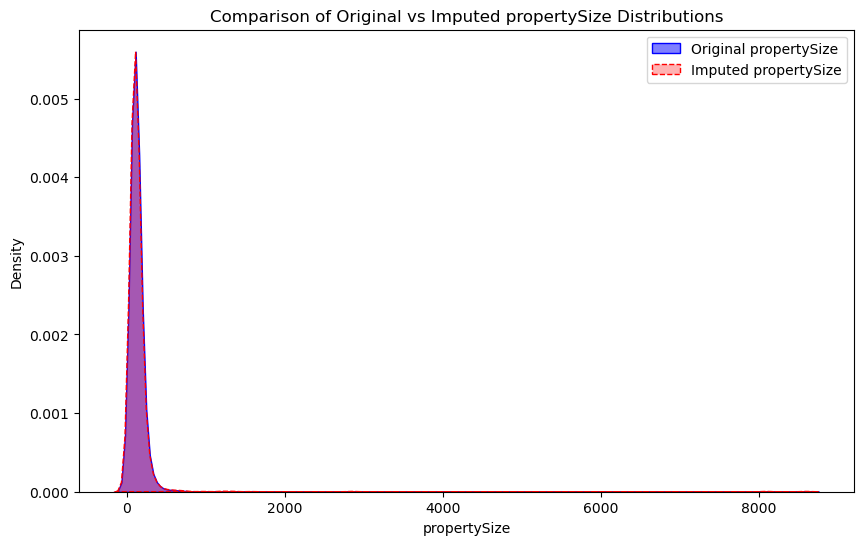

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'propertySize_original' contains the original values (before imputation)
# And 'propertySize_imputed' contains the values after imputation
# If you've already imputed the data into df['propertySize'], you can skip the creation of these two lists

# Create a figure for comparison
plt.figure(figsize=(10, 6))

# Plot original propertySize distribution
sns.kdeplot(df['propertySize'].dropna(), label='Original propertySize', color='blue', fill=True, alpha=0.5)

# Plot imputed propertySize distribution
sns.kdeplot(df['propertySize'], label='Imputed propertySize', color='red', linestyle='--', fill=True, alpha=0.3)

# Set title and labels
plt.title('Comparison of Original vs Imputed propertySize Distributions')
plt.xlabel('propertySize')
plt.ylabel('Density')
plt.legend()

# Show plot
plt.show()


In [69]:
# Assuming your DataFrame is named df
# Selecting relevant features for imputation, but only imputing propertySize
columns_for_imputation = ['propertySize', 'numBedrooms', 'numBathrooms', 'price', 'longitude', 'latitude']

In [71]:
# Subset of the dataframe for relevant columns
data_for_imputation = df[columns_for_imputation]

In [72]:
# Initialize IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)

In [73]:
# Fit the imputer on the data and transform it
imputed_data = imp.fit_transform(data_for_imputation)

In [74]:
# Updating only the 'propertySize' column with the imputed values
df['propertySize'] = imputed_data[:, 0]



In [75]:
# Check result
print(df[['propertySize']].isnull().sum())  # should show 0 missing values

propertySize    0
dtype: int64


In [106]:
for v in df['propertySize'].values:
    print(v)

96.0
93.0
162.0
127.36874077965071
68.0
113.0
613.0
104.0
169.0
400.0
70.0
170.02419327265176
58.0
204.0
108.0
95.0
84.0
128.87592587562767
73.0
70.0
62.0
91.0
62.0
288.0
286.0
114.0
120.0
225.0
70.0
85.0
295.0
95.0
84.0
84.0
73.0
54.999999999999986
234.0
84.0
210.0
65.0
78.0
155.0
120.0
82.0
127.0
103.0
63.0
90.0
182.0
84.0
58.0
61.0
157.0
84.0
85.0
113.0
102.0
96.0
205.0
82.0
178.0
125.0
164.0
98.0
166.0
130.0
116.0
98.0
125.0
203.0
250.0
150.0
104.0
198.0
205.0
152.0
160.0
66.0
62.0
65.0
81.0
59.0
60.0
96.0
332.0
109.0
146.0
244.0
98.0
78.0
169.0
152.0
261.0
155.0
130.0
86.61969288836606
142.62957303060762
116.0
166.921572715492
122.0
232.0
109.0
48.0
121.0
56.0
155.0
116.0
122.26539047582033
232.0
285.0
123.44641178105917
204.0
376.0
557.0
98.39701156641011
107.0
166.0
125.08520846239851
125.0
133.0
126.0
370.0
78.0
56.0
114.0
132.0
250.0
80.0
152.0
63.0
82.0
80.0
68.0
67.0
106.0
124.0
113.58349310202465
238.0
104.0
110.0
136.0
118.03585729451035
41.0
107.7548030695344
98.0
117.0
9

In [38]:
for v in df['propertySize'].values:
    print(v)


96.0
93.0
162.0
138.34387518834558
68.0
113.0
613.0
104.0
169.0
400.0
70.0
152.89773842107792
58.0
204.0
108.0
95.0
84.0
156.1157132222594
73.0
70.0
62.0
91.0
62.0
288.0
286.0
114.0
120.0
225.0
70.0
85.0
295.0
95.0
84.0
84.0
73.0
55.0
234.0
84.0
210.0
65.0
78.0
155.0
120.0
82.0
127.0
103.0
63.0
90.0
182.0
84.0
58.0
61.0
157.0
84.0
85.0
113.0
102.0
96.0
205.0
82.0
178.0
125.0
164.0
98.0
166.0
130.0
116.0
98.0
125.0
203.0
250.0
150.0
104.0
198.0
205.0
152.0
160.0
66.0
62.0
65.0
81.0
59.0
60.0
96.0
332.0
109.0
146.0
244.0
98.0
78.0
169.0
152.0
261.0
155.0
130.0
127.86161600900667
158.76072624148648
116.0
213.13052287185386
122.0
232.0
109.0
48.0
121.0
56.0
155.0
116.0
147.6188896282207
232.0
285.0
110.22890853375657
204.0
376.0
557.0
142.61692753050718
107.0
166.0
162.86965569273667
125.0
133.0
126.0
370.0
78.0
56.0
114.0
132.0
250.0
80.0
152.0
63.0
82.0
80.0
68.0
67.0
106.0
124.0
142.28856552919524
238.0
104.0
110.0
136.0
153.84537416637022
41.0
142.9220029500835
98.0
117.0
99.0
195.0
20

In [39]:
df['propertySize'].describe()

count    3967.000000
mean      132.465892
std       282.039009
min         1.000000
25%        80.000000
50%       106.000000
75%       139.000000
max      8600.000000
Name: propertySize, dtype: float64

<div>
count    3967.000000
mean      132.465892
std       282.039009
min         1.000000
25%        80.000000
50%       106.000000
75%       139.000000
max      8600.000000
Name: propertySize, dtype: float64
</div>